In [1]:
import tweepy
import re
from textblob import TextBlob 
import matplotlib.pyplot as plt
import pandas as pd
import csv

In [2]:
access_token = "1468179036941668352-rNUi3DItaKOF3YJud9sUeOtMs71JcK"
access_token_secret = "fihB8zEvvHpg3WoKcv2jZDPR4OuRuLSXuerPk9BhFChAM"
api_key = "3kuOzOP8qFAYY1IEuC7YgANww"
api_key_secret ="e5OTJoBiRftR7slvcHA5KkA6huxwwjeTOmdMB8STE9vJ5YUaHO"

auth = tweepy.OAuthHandler(api_key,api_key_secret)
auth.set_access_token(access_token,access_token_secret)
api = tweepy.API(auth,wait_on_rate_limit=True)

In [3]:
search_key = "london"
hasil_search = api.search_tweets(q=search_key, lang = "en", count = 1000)

In [4]:
csvFile = open(search_key+".csv","a+",newline="",encoding="utf-8")
csvWriter = csv.writer(csvFile)

In [46]:
hasilAnalisis = []

for tweet in hasil_search:
    tweet_properties = {}
    tweet_properties["tanggal tweet"] = tweet.created_at
    tweet_properties["username"] = tweet.user.screen_name
    tweet_properties["tweet"] = tweet.text.encode("utf-8")
    data_clean =' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",tweet.text).split())
    
    analisis = TextBlob(data_clean)
    
    if analisis.sentiment.polarity > 0.0:
        tweet_properties["sentimen"] = "positif"
    elif analisis.sentiment.polarity == 0.0:
        tweet_properties["sentimen"] = "netral"
    else:
        tweet_properties["sentimen"] = "negatif"
        
    if tweet.retweet_count > 0:
        if tweet_properties not in hasilAnalisis:
            hasilAnalisis.append(tweet_properties)
    else:
        hasilAnalisis.append(tweet_properties)

    tweets = [tweet.created_at,tweet.user.screen_name,tweet.text.encode("utf-8"),tweet_properties["sentimen"]]
    csvWriter.writerow(tweets)

In [25]:
hasilAnalisis

[{'tanggal tweet': datetime.datetime(2021, 12, 15, 15, 16, 21, tzinfo=datetime.timezone.utc),
  'username': 'EvanSteeg1',
  'tweet': b'RT @EvanSteeg1: @AnneofKingston Right?  Our grandparents\xe2\x80\x99 generation stormed the Normandy beaches, endured the London Blitz, overcame a Gre\xe2\x80\xa6',
  'sentimen': 'positif'},
 {'tanggal tweet': datetime.datetime(2021, 12, 15, 15, 16, 21, tzinfo=datetime.timezone.utc),
  'username': 'AtFlavour',
  'tweet': b'RT @AtFlavour: Sumac lemon and garlic deep-fried chicken bites#Food #Foodies #Sydney #Melbourne #Adelaide #Perth #London #UnitedKingdom #Lo\xe2\x80\xa6',
  'sentimen': 'negatif'},
 {'tanggal tweet': datetime.datetime(2021, 12, 15, 15, 16, 20, tzinfo=datetime.timezone.utc),
  'username': 'BlackheathHigh',
  'tweet': b'The countdown to the end of term may have begun, but our school trips have not stopped yet!\n\nOn Monday, our GCSE RS\xe2\x80\xa6 https://t.co/8U5ZHuGtZ4',
  'sentimen': 'netral'},
 {'tanggal tweet': datetime.datetime(202

In [16]:
sentiment_positif =[t for t in hasilAnalisis if t["sentimen"]=="positif"]
sentiment_netral =[t for t in hasilAnalisis if t["sentimen"]=="netral"]
sentiment_negatif =[t for t in hasilAnalisis if t["sentimen"]=="negatif"]

In [8]:
sentiment_positif

[{'tanggal tweet': datetime.datetime(2021, 12, 15, 15, 16, 21, tzinfo=datetime.timezone.utc),
  'username': 'EvanSteeg1',
  'tweet': b'RT @EvanSteeg1: @AnneofKingston Right?  Our grandparents\xe2\x80\x99 generation stormed the Normandy beaches, endured the London Blitz, overcame a Gre\xe2\x80\xa6',
  'sentimen': 'positif'},
 {'tanggal tweet': datetime.datetime(2021, 12, 15, 15, 16, 17, tzinfo=datetime.timezone.utc),
  'username': 'TerriDevlin5',
  'tweet': b"RT @JonJonesSnr: Question.\nWhy might a prominent property developer want to fund a candidate's campaign to become the Mayor of London?",
  'sentimen': 'positif'},
 {'tanggal tweet': datetime.datetime(2021, 12, 15, 15, 16, 15, tzinfo=datetime.timezone.utc),
  'username': 'DMkpanam',
  'tweet': b'RT @stephnav: @chris_notcapn Friendly reminder his bro\xe2\x80\x99s antivax too. \xf0\x9f\xa5\xb4\xf0\x9f\xa5\xb4\xf0\x9f\xa5\xb4 https://t.co/4oUujN17pN',
  'sentimen': 'positif'},
 {'tanggal tweet': datetime.datetime(2021, 12, 15, 15, 16,

In [9]:
sentiment_negatif

[{'tanggal tweet': datetime.datetime(2021, 12, 15, 15, 16, 21, tzinfo=datetime.timezone.utc),
  'username': 'AtFlavour',
  'tweet': b'RT @AtFlavour: Sumac lemon and garlic deep-fried chicken bites#Food #Foodies #Sydney #Melbourne #Adelaide #Perth #London #UnitedKingdom #Lo\xe2\x80\xa6',
  'sentimen': 'negatif'},
 {'tanggal tweet': datetime.datetime(2021, 12, 15, 15, 16, 18, tzinfo=datetime.timezone.utc),
  'username': 'ToxicLemon69',
  'tweet': b'RT @Anthony23Bryant: \xe2\x80\x98So depressing\xe2\x80\x99: Covid empties City of London of pre-Christmas cheer https://t.co/TFpGdgLcBP',
  'sentimen': 'negatif'},
 {'tanggal tweet': datetime.datetime(2021, 12, 15, 15, 16, 2, tzinfo=datetime.timezone.utc),
  'username': 'tfkf1008',
  'tweet': b'RT @AaronGBurnett: It\xe2\x80\x99s disturbing the number of people who have called for essentially permanent travel restrictions, bans &amp; hotel quarant\xe2\x80\xa6',
  'sentimen': 'negatif'},
 {'tanggal tweet': datetime.datetime(2021, 12, 15, 15, 15,

In [10]:
sentiment_netral

[{'tanggal tweet': datetime.datetime(2021, 12, 15, 15, 16, 20, tzinfo=datetime.timezone.utc),
  'username': 'BlackheathHigh',
  'tweet': b'The countdown to the end of term may have begun, but our school trips have not stopped yet!\n\nOn Monday, our GCSE RS\xe2\x80\xa6 https://t.co/8U5ZHuGtZ4',
  'sentimen': 'netral'},
 {'tanggal tweet': datetime.datetime(2021, 12, 15, 15, 16, 19, tzinfo=datetime.timezone.utc),
  'username': 'soobles_',
  'tweet': b'@bearintak probably in London having a blast!',
  'sentimen': 'netral'},
 {'tanggal tweet': datetime.datetime(2021, 12, 15, 15, 16, 18, tzinfo=datetime.timezone.utc),
  'username': 'LBEAlexeievna',
  'tweet': b'RT @atlasmovement: @tlekshay @CTASpokesperson @Dotseten @SFTHQ @frances_hui @wethehongkonger @ColombeCS @Venzon_Andrea @hkdnow1 @lsbu_law @\xe2\x80\xa6',
  'sentimen': 'netral'},
 {'tanggal tweet': datetime.datetime(2021, 12, 15, 15, 16, 17, tzinfo=datetime.timezone.utc),
  'username': 'scouseylala',
  'tweet': b'RT @DavidLammy: Hours

In [11]:
print("Hasil Sentiment")
print("positif: ", len(sentiment_positif), "({} %)".format(100*len(sentiment_positif)/len(hasilAnalisis)))
print("netral: ", len(sentiment_netral), "({} %)".format(100*len(sentiment_netral)/len(hasilAnalisis)))
print("negatif: ", len(sentiment_negatif), "({} %)".format(100*len(sentiment_negatif)/len(hasilAnalisis)))

Hasil Sentiment
positif:  54 (54.0 %)
netral:  39 (39.0 %)
negatif:  7 (7.0 %)


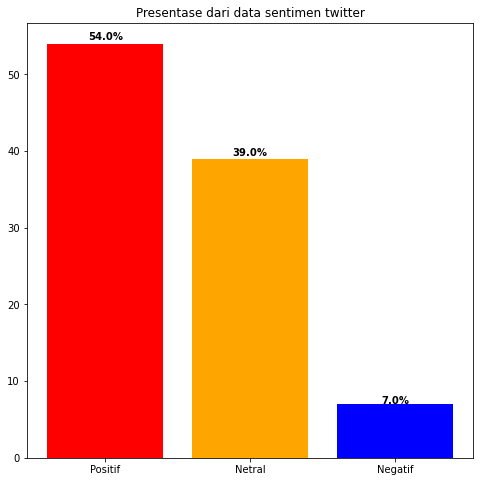

In [12]:
positif = len(sentiment_positif)
negatif = len(sentiment_negatif)
netral = len(sentiment_netral)
total = len(hasilAnalisis)

data = pd.DataFrame({'Format':['Positif','Netral','Negatif'],
                     'Matches': [positif,netral,negatif],
                     'Runs':[positif, netral, negatif]
                    })

percentage = []
for i in range(data.shape[0]):
    pct = (data.Runs[i] / total) * 100
    percentage.append(round(pct,2))
data['Percentage'] = percentage

plt.figure(figsize=(8,8))
colors_list = ['Red','Orange', 'Blue']
graph = plt.bar(data.Format,data.Runs, color = colors_list)
plt.title('Presentase dari data sentimen twitter')

i = 0
for p in graph:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
     
    plt.text(x+width/2,
             y+height*1.01,
             str(data.Percentage[i])+'%',
             ha='center',
             weight='bold')
    i += 1
plt.show()

In [71]:
explode=(0,0.1,0)
labels='Positive','Netral','Negatif'
sizes=[positif,netral,negatif]
colors=['red','Orange','Blue']

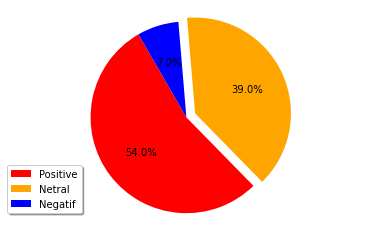

In [72]:
plt.pie(sizes,explode=explode,colors=colors,autopct='%1.1f%%',startangle=120)
plt.legend(labels,loc=(-0.05,0.05), shadow=True)
plt.axis('equal')
plt.savefig("Sentiment_Analysis.png")